# Gaussian Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("..")

from utils.utils import decorate

### Dot product ~ measure of similarity
- x1 . x2 = 0 -> very dissimilar
- x1 . x2 = 1 -> very simmilar


In [2]:
x1 = [0, 1]
x2 = [1, 0]
x3 = [0, 0.5]

In [3]:
np.dot(x1, x1)

1

## Joint distr. review

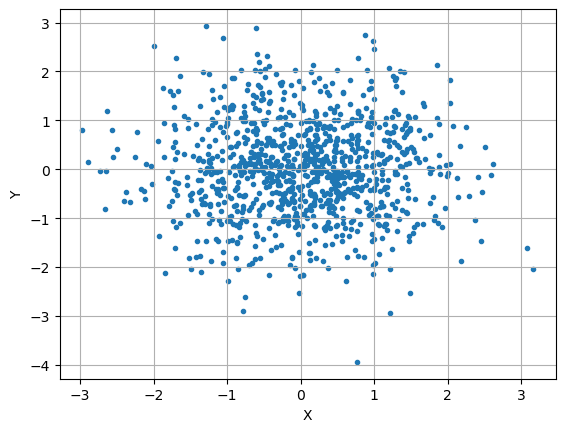

In [4]:
# Generate two uncorrelated variables with mean 0 and variance 1
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

# Plot the joint distribution in a scatterplot
plt.scatter(x, y, marker = '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


In [5]:
XY = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.7], [0.7, 1]], size=1000)
XY.shape

(1000, 2)

(array([[  2.,  20.,  66., 154., 210., 241., 175.,  92.,  30.,  10.],
        [  4.,  14.,  58., 142., 237., 233., 172.,  86.,  46.,   8.]]),
 array([-3.20367964, -2.58880222, -1.97392481, -1.35904739, -0.74416997,
        -0.12929256,  0.48558486,  1.10046227,  1.71533969,  2.33021711,
         2.94509452]),
 <a list of 2 BarContainer objects>)

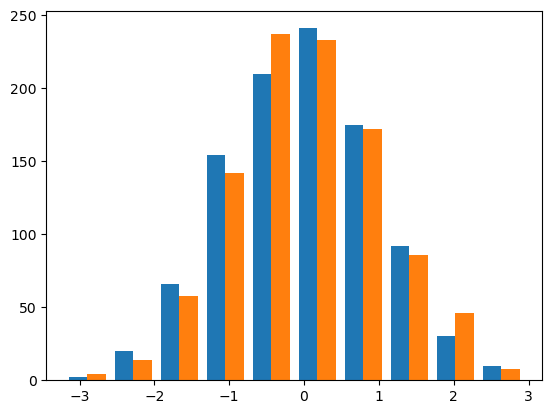

In [6]:
plt.hist(XY)

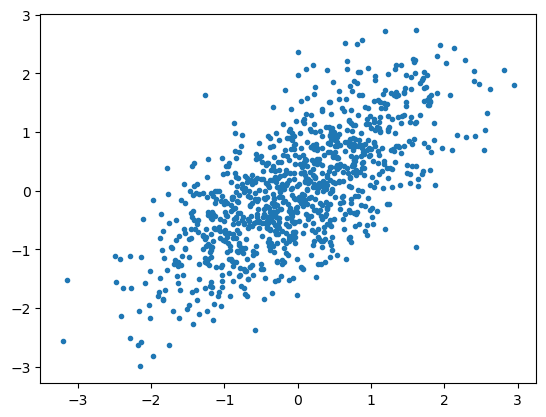

In [7]:
X = XY[:, 0]
Y = XY[:, 1]

plt.scatter(X, Y, marker = '.')

In [8]:
np.cov(X,Y)

array([[0.97098608, 0.67829457],
       [0.67829457, 0.98691213]])

## GP
- GP si essentially way to do a distribution over possible function
- $f(x) \sim GP(m(x), k(x.x'))$
- $m$ - $E[x]$
- $k$ - Where the kernel is a way to encode our prior knowledge about the problem

In [9]:
n_points = 10         # number of training points.
X = np.random.uniform(-5, 5, size=(n_points,1))

### Kernel
- squared exponential kernel
- encodes smoothness, values x1 and x2 close, then f(x1), f(x2) close.
- $k(x,x) = exp(-\frac{1}{2}(x- x)^2)$

In [10]:
def squared_distance(a, b):
    a_squared = np.sum(a**2, axis=1).reshape(-1, 1)
    b_squared = np.sum(b**2, axis=1)
    ab_product = 2 * np.dot(a, b.T)
    return a_squared + b_squared - ab_product

def kernel(a,b, kernel_width = 0.1):
    sqdist = squared_distance(a, b)
    return np.exp(-.5 * (1/kernel_width) * sqdist)

### Cholesky decomposition
- we can decompose covariance matrix K as follows
- $K = LL^T$
- this then allows us to draw samples from joint distr.
- example: 
- we want $f^i \sim N(0, K)$
- we do $f^i \sim N(0,I) \cdot L$
- 
  
  

In [11]:
sigma = 0.0005
K = kernel(X, X)
L = np.linalg.cholesky(K) # with no noise
L

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.29148930e-28,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.27599770e-01,  1.60068897e-19,  9.91825740e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.30637852e-20, -1.68717388e-48, -1.68067426e-21,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.72104963e-39, -4.80569579e-67, -4.78718247e-40,
         9.38428472e-04,  9.99999560e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

## GP prior

In [12]:

n_samples = 3 # how many functions we want to sample from the prior
n_points = 1000
xs = np.linspace(-5, 5, n_points).reshape(-1,1)
xs

array([[-5.        ],
       [-4.98998999],
       [-4.97997998],
       [-4.96996997],
       [-4.95995996],
       [-4.94994995],
       [-4.93993994],
       [-4.92992993],
       [-4.91991992],
       [-4.90990991],
       [-4.8998999 ],
       [-4.88988989],
       [-4.87987988],
       [-4.86986987],
       [-4.85985986],
       [-4.84984985],
       [-4.83983984],
       [-4.82982983],
       [-4.81981982],
       [-4.80980981],
       [-4.7997998 ],
       [-4.78978979],
       [-4.77977978],
       [-4.76976977],
       [-4.75975976],
       [-4.74974975],
       [-4.73973974],
       [-4.72972973],
       [-4.71971972],
       [-4.70970971],
       [-4.6996997 ],
       [-4.68968969],
       [-4.67967968],
       [-4.66966967],
       [-4.65965966],
       [-4.64964965],
       [-4.63963964],
       [-4.62962963],
       [-4.61961962],
       [-4.60960961],
       [-4.5995996 ],
       [-4.58958959],
       [-4.57957958],
       [-4.56956957],
       [-4.55955956],
       [-4

In [13]:
K_sample = kernel(xs, xs)
K_sample + 1e-6*np.eye(n_points)

array([[1.00000100e+000, 9.99499124e-001, 9.97998001e-001, ...,
        5.26437893e-217, 1.93762923e-217, 7.12457641e-218],
       [9.99499124e-001, 1.00000100e+000, 9.99499124e-001, ...,
        1.42885593e-216, 5.26437893e-217, 1.93762923e-217],
       [9.97998001e-001, 9.99499124e-001, 1.00000100e+000, ...,
        3.87431188e-216, 1.42885593e-216, 5.26437893e-217],
       ...,
       [5.26437893e-217, 1.42885593e-216, 3.87431188e-216, ...,
        1.00000100e+000, 9.99499124e-001, 9.97998001e-001],
       [1.93762923e-217, 5.26437893e-217, 1.42885593e-216, ...,
        9.99499124e-001, 1.00000100e+000, 9.99499124e-001],
       [7.12457641e-218, 1.93762923e-217, 5.26437893e-217, ...,
        9.97998001e-001, 9.99499124e-001, 1.00000100e+000]])

#### Sampling
- $f_i \sim L \cdot N(0,1)$ 

In [14]:

L_sample = np.linalg.cholesky(K_sample + 1e-6*np.eye(n_points))

fs = np.dot(L_sample, np.random.normal(size=(n_points, n_samples)))
fs
# we want f(x) at these x points

array([[ 0.26251825, -1.36290087,  0.91734888],
       [ 0.16646534, -1.27192474,  0.88036986],
       [ 0.07184999, -1.17709596,  0.83658212],
       ...,
       [ 0.90339781,  0.17289477,  0.48984149],
       [ 0.86635103,  0.12030383,  0.45039581],
       [ 0.82752064,  0.07440779,  0.40855478]])

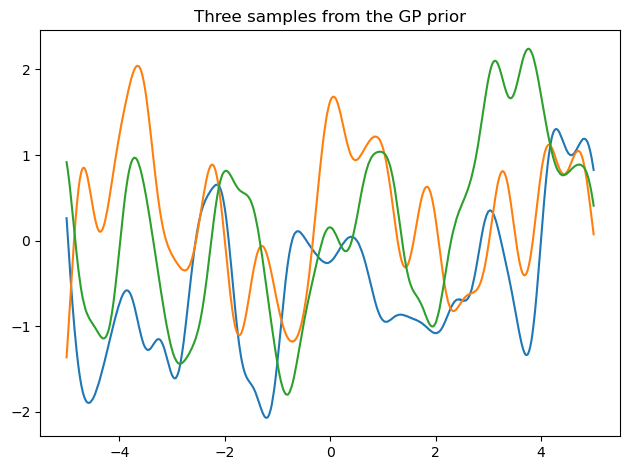

In [15]:
plt.plot(xs, fs)
decorate(title='Three samples from the GP prior')

## GP prediction

In [16]:
n_train = 25
n_test = 50
s = 0.00005 # Q: where is this from?

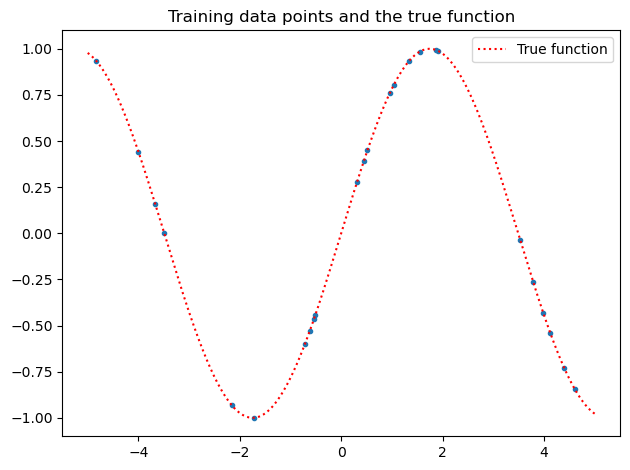

In [17]:
f = lambda x: np.sin(0.9*x).flatten()

X = np.random.uniform(-5, 5, size=(n_train,1))
y = f(X) + s*np.random.randn(n_train)

plt.scatter(X, y, marker = '.')# Plot the training points
X_true = np.linspace(-5, 5, 1000)  # create points to plot true function
y_true = f(X_true)  # get the true function values for the points
plt.plot(X_true, y_true, label='True function', color='r', linestyle = ':')  # plot the true function

decorate(title='Training data points and the true function')

In [18]:
X_test = np.linspace(-5, 5, n_test).reshape(-1,1)
y_test = np.full_like(X_test, np.nan)  # create an array filled with NaN values of the same shape as xs_test

##### Cholesky, $K=LL^T$

In [19]:
K_train = kernel(X, X)
L_train = np.linalg.cholesky(K_train + s*np.eye(n_train))
L_train

array([[ 1.00002500e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.22499559e-04,  1.00002486e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
    

## Compute mean and variance at test pts
- $\alpha = L^T \backslash (L \backslash y) $
- **mean** - $E[f_*] = k_{*}^T \alpha$ 
- $v = L \backslash k_{*}$
- **variance** - $var[f_{*}] = k(x_*, x_*) - v^Tv$

### How to compute mean at test points?
- $ \mu_{\star} = k_{\star}^T K_{y}^{-1} y$ - difficult to invert K
  - $ \mu_{\star} = k_{\star}^T \cdot \alpha$
- $K_y = LL^T$ - cholesky
- $\alpha= K_{y}^{-1} \cdot y = (LL^T)^{-1} y = L^{-T} L^{-1} y$
  - $\alpha=L^{-T} L^{-1} y = L^{-T} m ~~~~ (m=L^{-1} y)$ 
    - $Lm=y$ 
- $ L^{T} \alpha = m ~~~~ (\alpha = L^{-T} m)$
- $\mu_{\star} = k_{\star}^T \alpha$ 


In [35]:
K_train = kernel(X, X)

m = np.linalg.solve(L_train, y)
alpha = np.linalg.solve(L_train.T, m)

In [48]:
k_star = kernel(X, X_test)
mu = np.dot(k_star.T, alpha)
mu

array([ 0.81256206,  0.93363372,  0.75828644,  0.54161693,  0.47340129,
        0.43401824,  0.27407268,  0.06311109, -0.05521768, -0.06565573,
       -0.05619514, -0.12048151, -0.32311847, -0.64455685, -0.94896141,
       -1.09276941, -1.01480115, -0.76950862, -0.568853  , -0.57893922,
       -0.65959055, -0.59895074, -0.44335484, -0.28629257, -0.10516651,
        0.08974411,  0.27201755,  0.44316192,  0.59756895,  0.73532076,
        0.84577631,  0.92937757,  0.98184221,  0.99563398,  0.98263119,
        0.83486285,  0.51219606,  0.21019792,  0.0715894 ,  0.06680762,
        0.10515894,  0.07414383, -0.07134552, -0.25354647, -0.42619135,
       -0.58221707, -0.72156195, -0.83947937, -0.77814298, -0.49032468])

### Variance
- $var[f_{*}] = k(x_*, x_*) - v^Tv$

In [52]:
K_test = kernel(X_test, X_test)
v = np.linalg.solve(L_train, k_star)

variance = np.diag(K_test) - np.sum(v**2, axis=0)
sigma = np.sqrt(variance)
sigma

array([0.4799273 , 0.13137273, 0.64451747, 0.74655295, 0.40207706,
       0.03165848, 0.08335701, 0.03882268, 0.20188771, 0.66210905,
       0.92844012, 0.97727613, 0.87387159, 0.51503133, 0.03607052,
       0.32388373, 0.04129307, 0.49987248, 0.784916  , 0.62255899,
       0.21749413, 0.00739837, 0.00587236, 0.16490638, 0.3189168 ,
       0.16469564, 0.00781818, 0.00627645, 0.03406151, 0.01163048,
       0.01426382, 0.00786975, 0.00732785, 0.02342406, 0.01349836,
       0.2536021 , 0.68552808, 0.93719621, 0.99010459, 0.94226165,
       0.69934206, 0.25253241, 0.02363715, 0.00762452, 0.00726625,
       0.01243544, 0.00780625, 0.01051547, 0.29110689, 0.73002982])

### His solution

In [49]:
# compute the mean at our test points.
Lk = np.linalg.solve(L_train, kernel(X, X_test)) #TODO check why this also works
mu_his = np.dot(Lk.T, np.linalg.solve(L_train, y))
np.allclose(mu, mu_his)

True

### Compute variance at test points

In [51]:
# compute the variance at our test points.
K_test = kernel(X_test, X_test)
s2 = np.diag(K_test) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)
np.allclose(sigma, s)

array([0.4799273 , 0.13137273, 0.64451747, 0.74655295, 0.40207706,
       0.03165848, 0.08335701, 0.03882268, 0.20188771, 0.66210905,
       0.92844012, 0.97727613, 0.87387159, 0.51503133, 0.03607052,
       0.32388373, 0.04129307, 0.49987248, 0.784916  , 0.62255899,
       0.21749413, 0.00739837, 0.00587236, 0.16490638, 0.3189168 ,
       0.16469564, 0.00781818, 0.00627645, 0.03406151, 0.01163048,
       0.01426382, 0.00786975, 0.00732785, 0.02342406, 0.01349836,
       0.2536021 , 0.68552808, 0.93719621, 0.99010459, 0.94226165,
       0.69934206, 0.25253241, 0.02363715, 0.00762452, 0.00726625,
       0.01243544, 0.00780625, 0.01051547, 0.29110689, 0.73002982])

### Plotting prediction

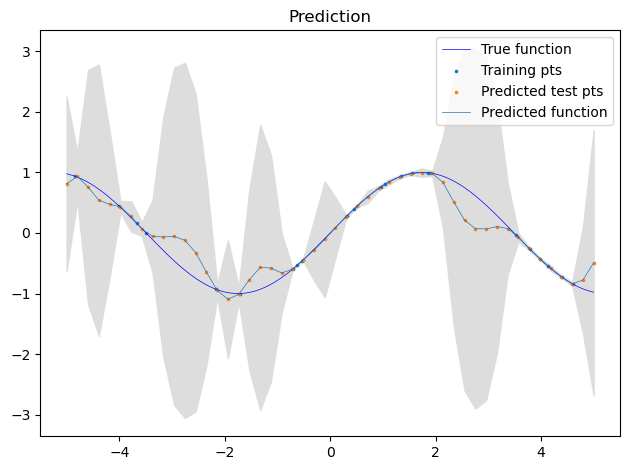

In [22]:
plt.plot(X_true, y_true, label='True function', color='b', lw=.5)
plt.gca().fill_between(X_test.flat, y_test-3*s, y_test+3*s, color="#dddddd")
plt.scatter(X, y, label="Training pts", marker = '.', s=10) 
plt.scatter(X_test, y_test, label="Predicted test pts", marker = '.', s=10) # plot the true function
plt.plot(X_test, y_test, lw=.5, label="Predicted function")

decorate(title = "Prediction")  # plot the predicted mean

## GP posterior
- Data $D = \{x_i, f_i\}, i=1..N$
- $p(f|D) = \frac{P(D|f) \cdot p(f)}{p(D)}$
- **prior** $p(f)$ - via covariance matrix / kernel
  - I am specifying the similarity function. 
  - *Hey function approximator, if two points are close by, I want their "heights" to be close by as well*
  - *Lets not only pay attention to the data but pay attention to what makes common sense*
  
- $f_{post} = \mu + N(0,1)L$
- $K = LL^T$
- TODO: understand vTv in the following cell

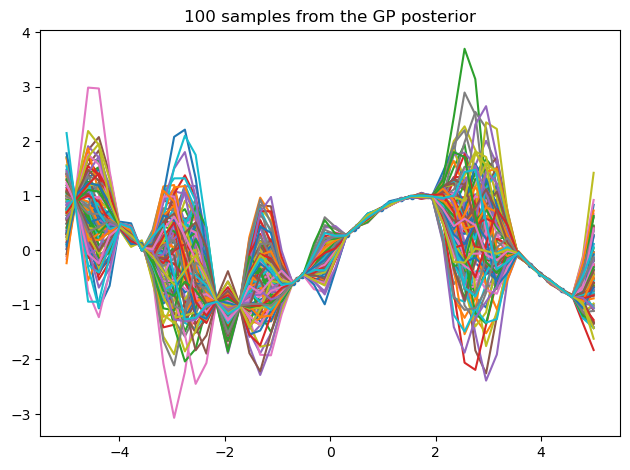

In [60]:
n_posterior_samples = 100

L = np.linalg.cholesky(K_test + 1e-6*np.eye(n_test) - np.dot(v.T, v))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n_test, n_posterior_samples)))

plt.plot(X_test, f_post)
plt.scatter(X, y, marker = '.')
decorate(title=f'{n_posterior_samples} samples from the GP posterior')